In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_bank = pd.read_csv('Customer-Churn-Records.csv')
df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


# Limpeza de dados

Nessa etapa vamos fazer a limpeza de dados, onde veremos se há valores ausentes no dataframe e exibir
a porcentagem de valores ausentes em cada coluna, em seguida (caso haja), vamos preencher os valores
ausentes, checar novamente se ainda há algum valor ausente e em seguida eliminar as duplciatas.

In [3]:
# 1. Verificar valores ausentes em cada coluna
print("Quantidade de valores ausentes em cada coluna:")
print(df_bank.isnull().sum())

# 2. Verificar a porcentagem de valores ausentes
print("\nPorcentagem de valores ausentes em cada coluna:")
print(df_bank.isnull().mean() * 100)

# 3. Verificar os tipos das colunas
print("\nTipos das colunas:")
print(df_bank.dtypes)

# Separar as colunas numéricas e categóricas
numerical_cols = df_bank.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df_bank.select_dtypes(include=['object']).columns

# 5. Verificar duplicatas no dataframe
print("\nQuantidade de duplicatas:")
print(df_bank.duplicated().sum())

# 6. Remover duplicatas, se houver
df_bank = df_bank.drop_duplicates()

# 7. Verificar o número de duplicatas após remoção
print("\nQuantidade de duplicatas após remoção:")
print(df_bank.duplicated().sum())

Quantidade de valores ausentes em cada coluna:
RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

Porcentagem de valores ausentes em cada coluna:
RowNumber             0.0
CustomerId            0.0
Surname               0.0
CreditScore           0.0
Geography             0.0
Gender                0.0
Age                   0.0
Tenure                0.0
Balance               0.0
NumOfProducts         0.0
HasCrCard             0.0
IsActiveMember        0.0
EstimatedSalary       0.0
Exited                0.0
Complain              0.0
Satisfaction Score    0.0
Card Type             0.0
Point Earned     

# Análise Exploratória de Dados (EDA)

Nessa etapa descreveremos estatísticas gerais, utilizando df.describe() para insights iniciais.
Plotaremos distribuições de variáveis usando sns.histplot() e sns.boxplot() para visualizar variáveis
numéricas.

In [4]:
# Estatísticas descritivas para variáveis numéricas
df_bank.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


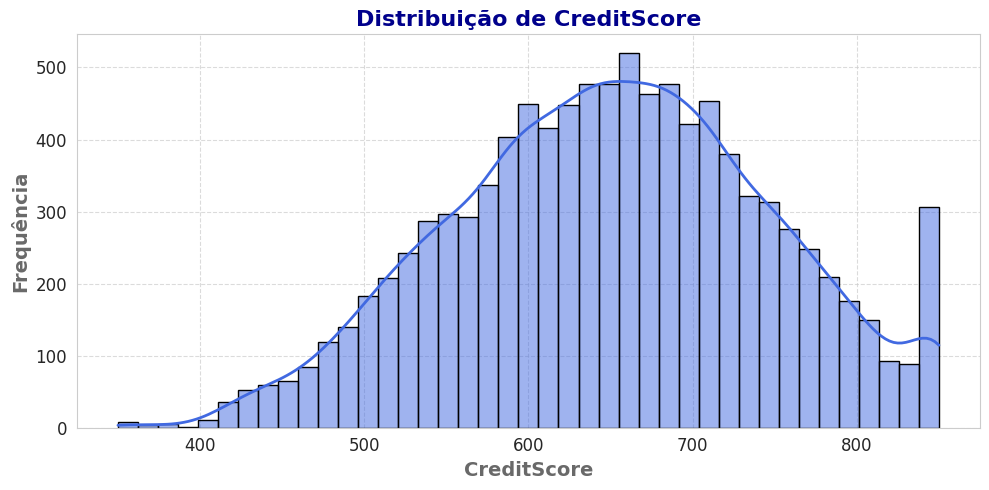

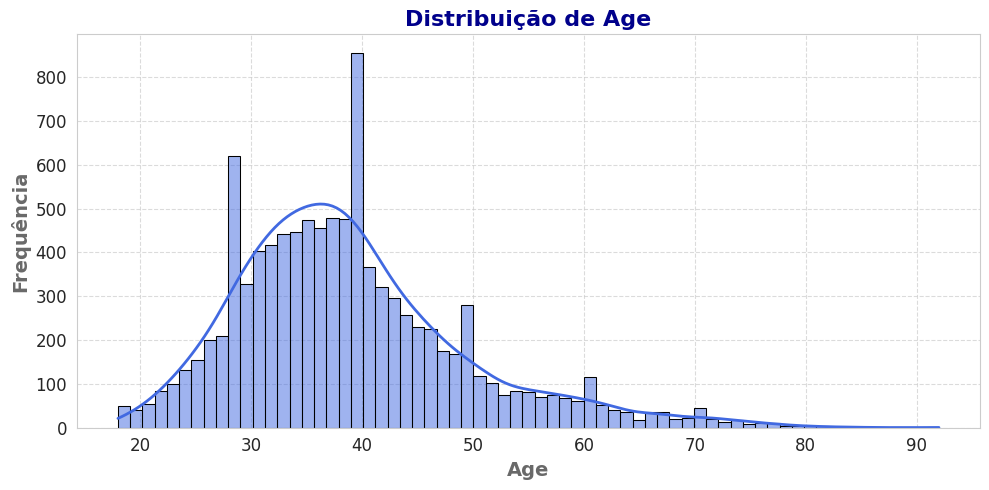

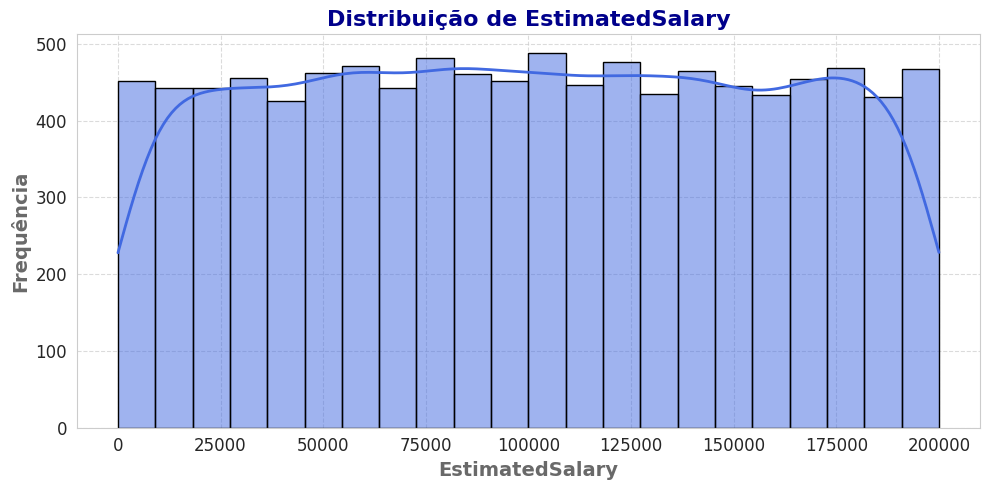

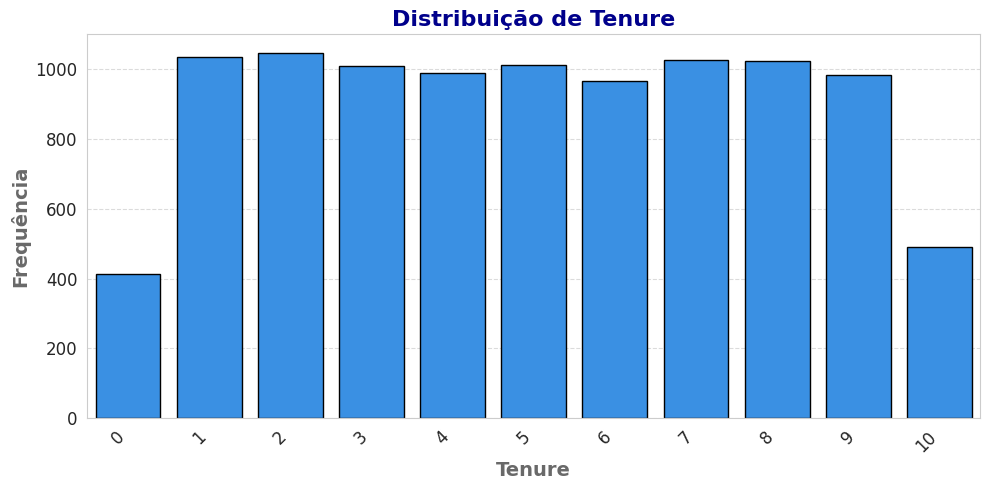

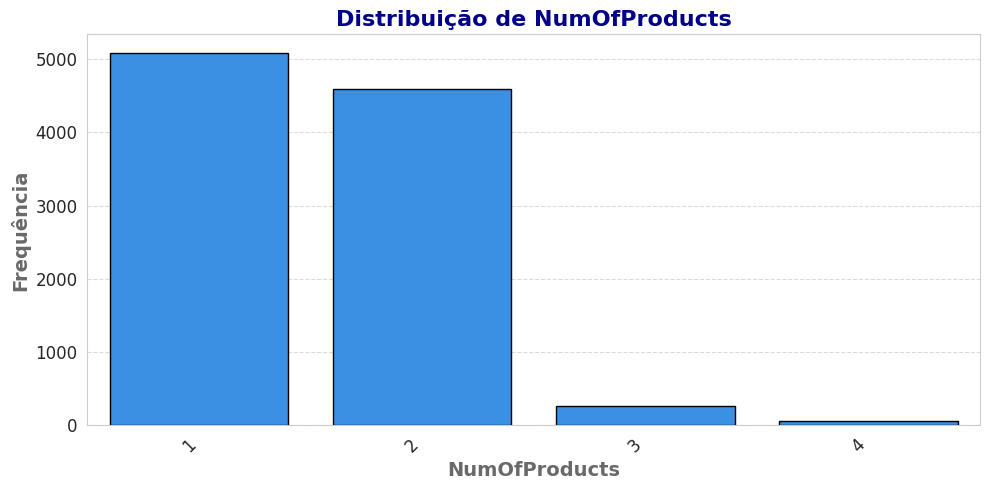

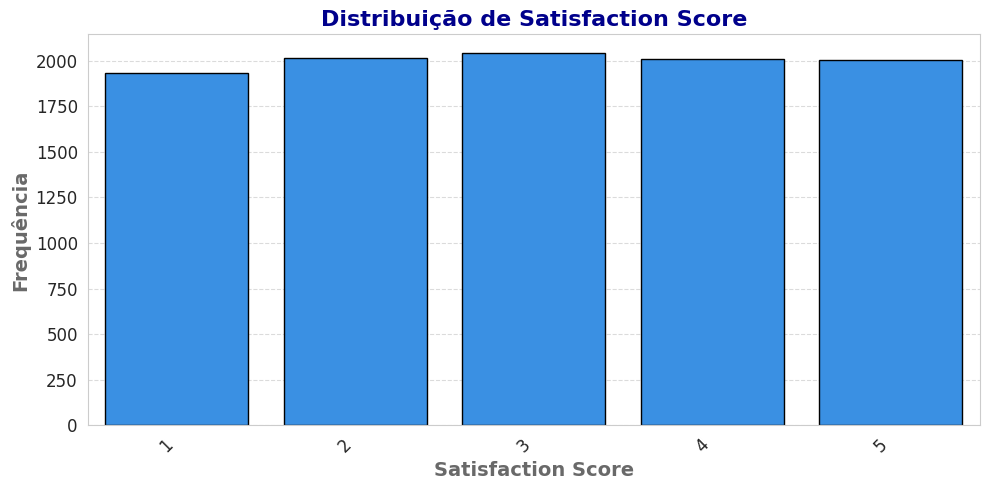

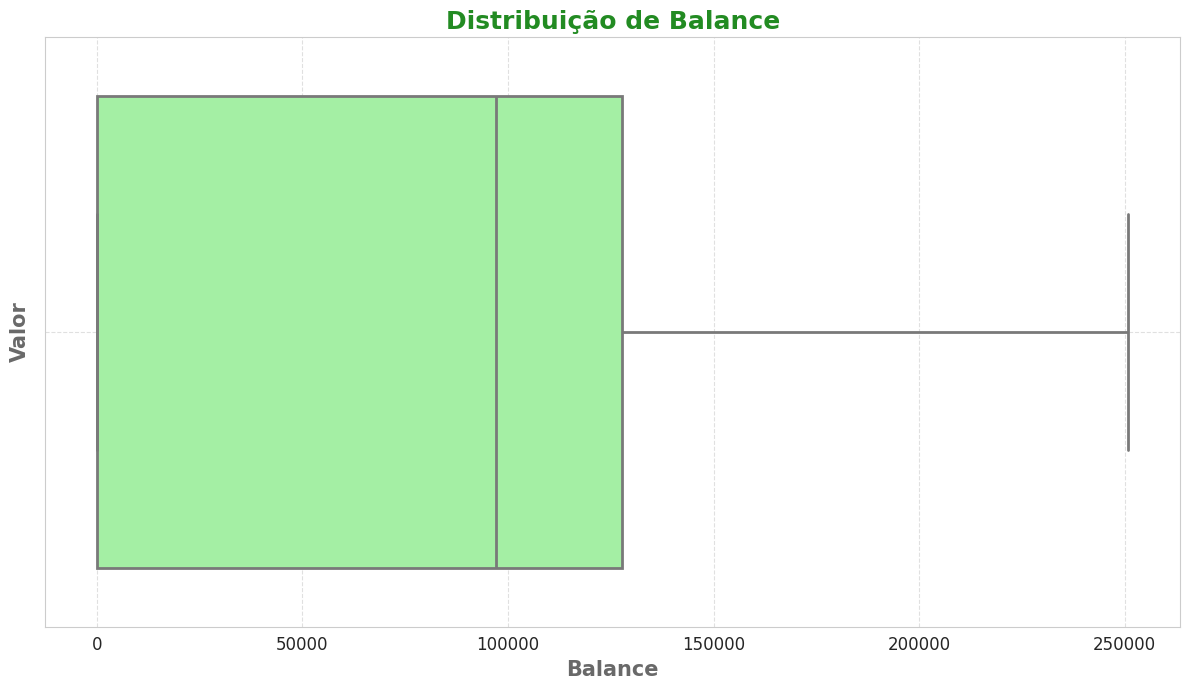

In [5]:
# Criando uma listas com as colunas numéricas
colunas_numericas1 = [
    'CreditScore', 'Age', 'EstimatedSalary',
]

colunas_numericas2 = [
    'Tenure', 'NumOfProducts', 'Satisfaction Score'
]

# Configuração de estilo geral para todos os gráficos
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlecolor': 'darkblue',
    'axes.labelcolor': 'dimgray'
})

# Plotando cada variável da lista 1
for coluna in colunas_numericas1:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_bank[coluna], kde=True, color='royalblue', edgecolor="black", line_kws={'linewidth': 2})
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotando cada variável da lista 2
for coluna in colunas_numericas2:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df_bank[coluna], color='dodgerblue', edgecolor="black")
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plotando a variável Balance
plt.figure(figsize=(12, 7))
sns.boxplot(x=df_bank['Balance'], color='palegreen', linewidth=2, fliersize=3, whis=1.5)
plt.title('Distribuição de Balance', fontsize=18, weight='bold', color='forestgreen')
plt.xlabel('Balance', fontsize=15, weight='bold', color='dimgray')
plt.ylabel('Valor', fontsize=15, weight='bold', color='dimgray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Visualizações de Variáveis Categóricas

Nessa etapa analisaremos algumas variáveis usando o gráficos de barras para observar padrões.
Estudaremos o impacto de variáveis como Card Type e HasCrCard, ou Gender e Geography para
verificar como influenciam o churn.

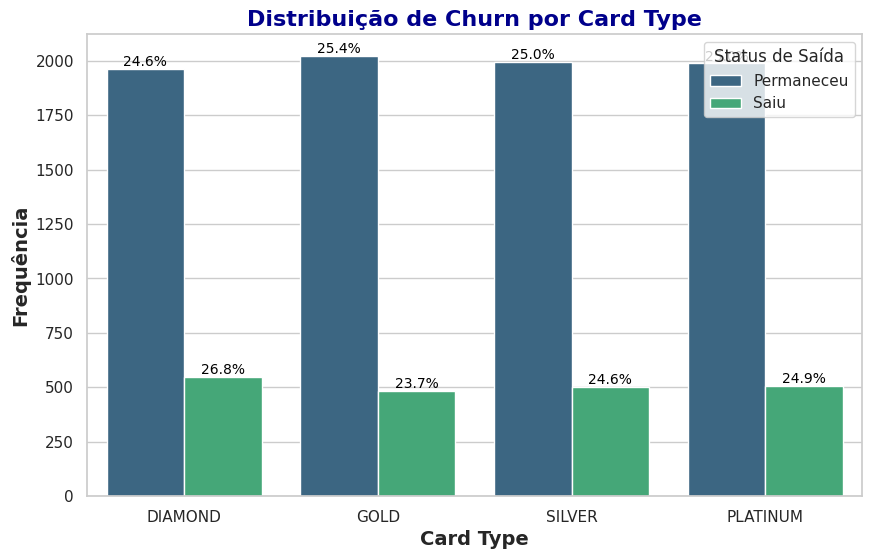

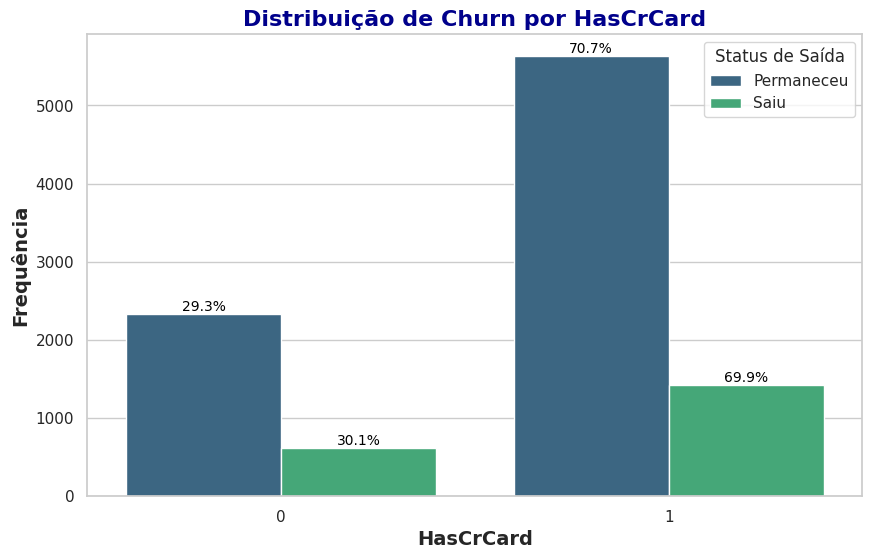

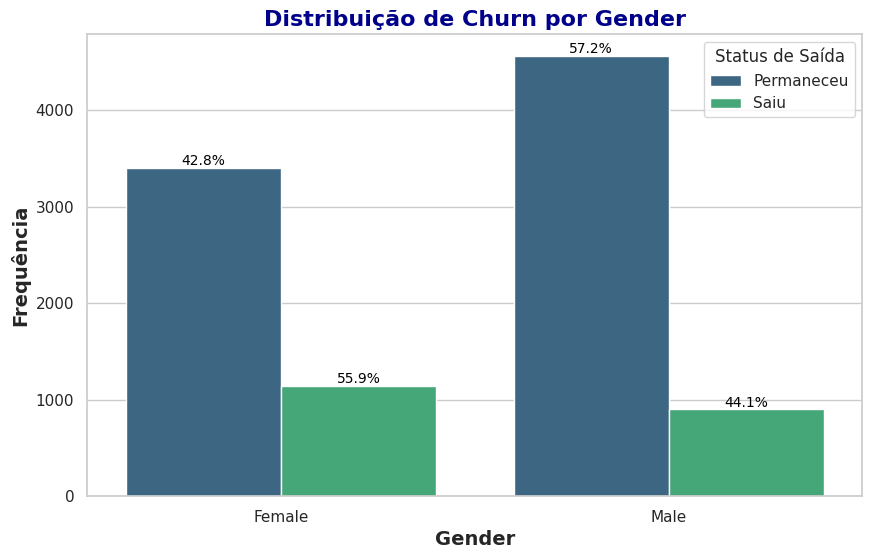

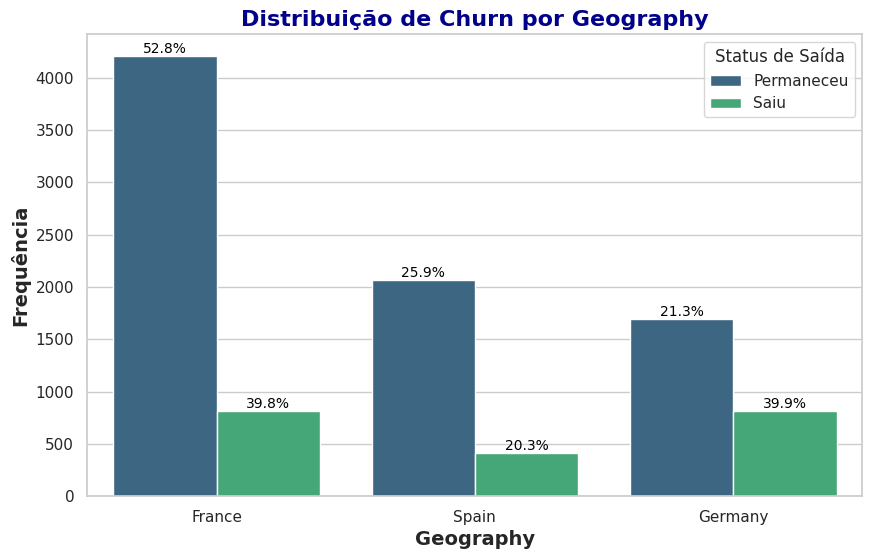

In [6]:

sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 14, 'axes.titlesize': 16})

# Loop para gráficos Card Type e HasCrCard
for coluna in ['Card Type', 'HasCrCard']:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df_bank[coluna], hue=df_bank['Exited'], palette="viridis", dodge=True)

    for container in ax.containers:
        total = sum([p.get_height() for p in container])  # Total de cada grupo
        for p in container:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Distribuição de Churn por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend(title='Status de Saída', loc='upper right', labels=['Permaneceu', 'Saiu'])
    plt.show()

for coluna in ['Gender', 'Geography']:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(x=df_bank[coluna], hue=df_bank['Exited'], palette="viridis", dodge=True)

    for container in ax.containers:
        total = sum([p.get_height() for p in container])  # Total de cada grupo
        for p in container:
            height = p.get_height()
            percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black')

    plt.title(f'Distribuição de Churn por {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.legend(title='Status de Saída', loc='upper right', labels=['Permaneceu', 'Saiu'])
    plt.show()

# Análise de Correlação

Nessa etapa calcularemos a matriz de correlação usando df.corr() e visualizaremos com sns.heatmap().
Também identificaremos variáveis fortemente correlacionadas destacando variáveis que podem afetar o
churn.

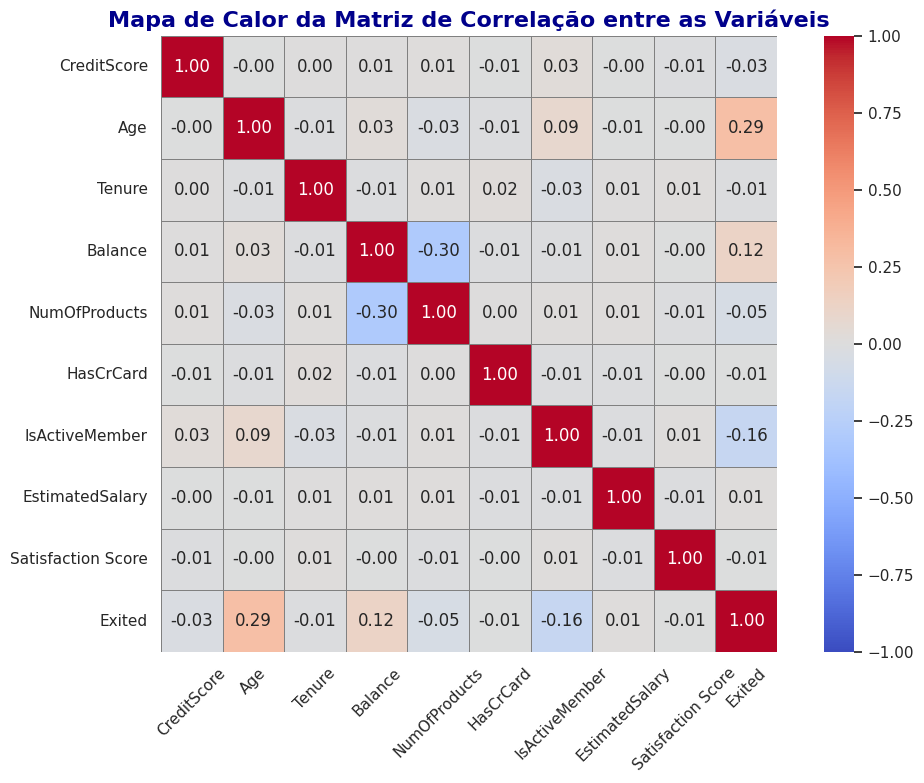

In [7]:
#Criando lista com as variáveis numéricas
colunas_numericas = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
    'IsActiveMember', 'EstimatedSalary', 'Satisfaction Score', 'Exited'
]

matriz_correlacao = df_bank[colunas_numericas].corr()

plt.figure(figsize=(12, 8))

# Criando o mapa de calor
sns.heatmap(matriz_correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True,
            linewidths=0.5, linecolor='gray', vmin=-1, vmax=1)

plt.title('Mapa de Calor da Matriz de Correlação entre as Variáveis')
plt.xticks(rotation=45)
plt.show()


# Análise Bivariada

Nessa etapa vamos comparar variáveis com Exited usando sns.countplot() para visualizar a distribuição e sns.violinplot(), sns.kdeplot ou sns.boxplot() para analisar a densidade/Frequência em
valores diferentes, assim comparando os grupos.
Exploraremos combinações como Age e Tenure para entender como afetam a decisão de saída

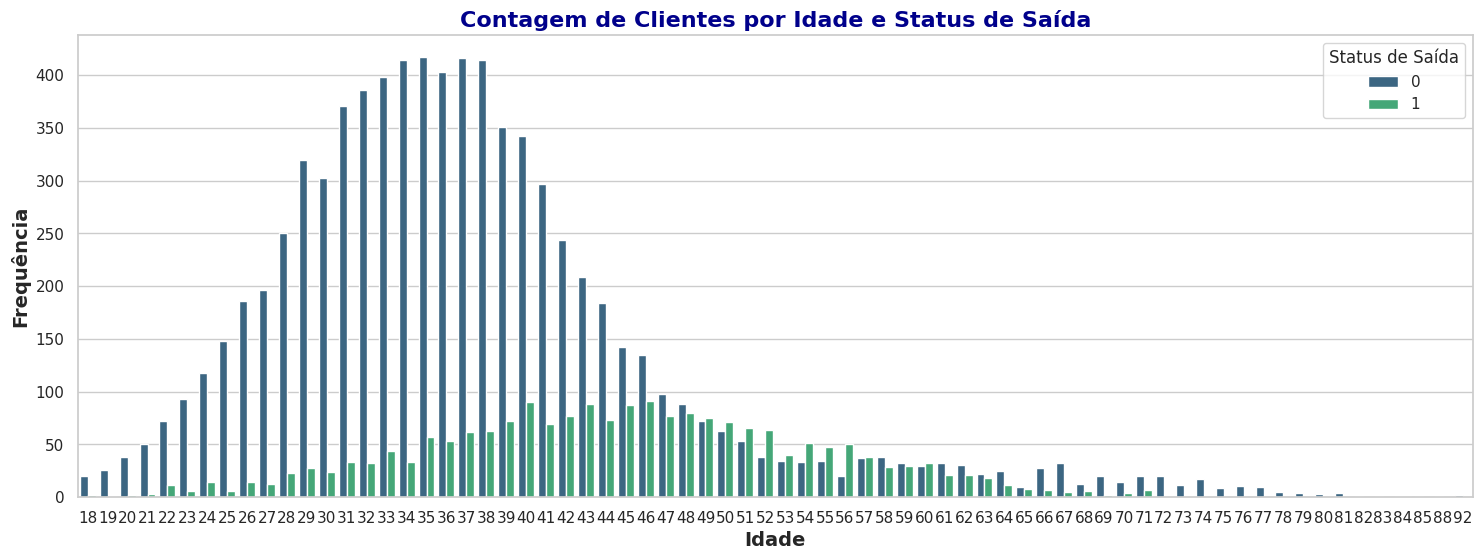

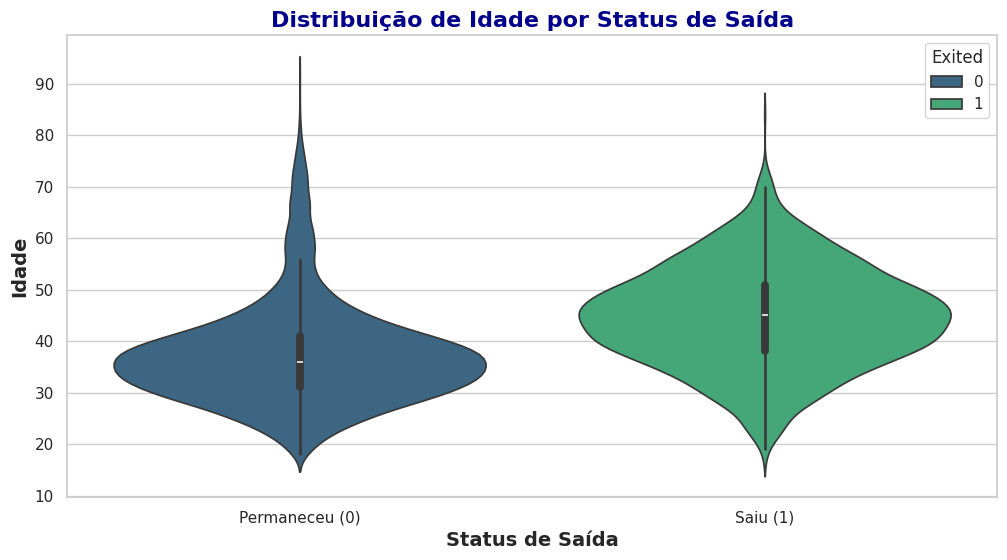

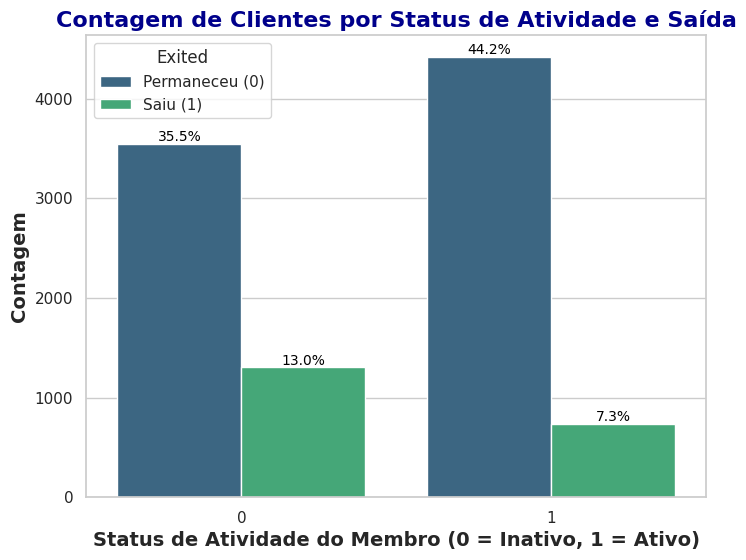

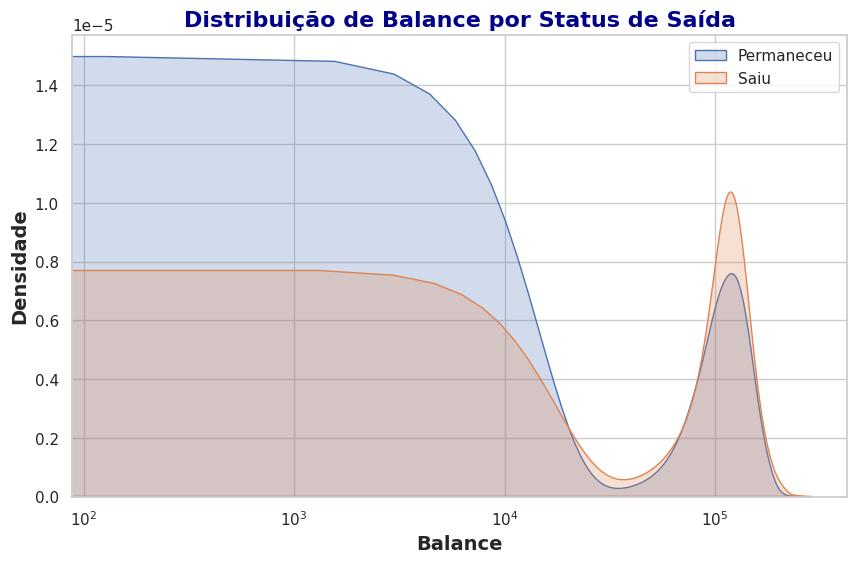

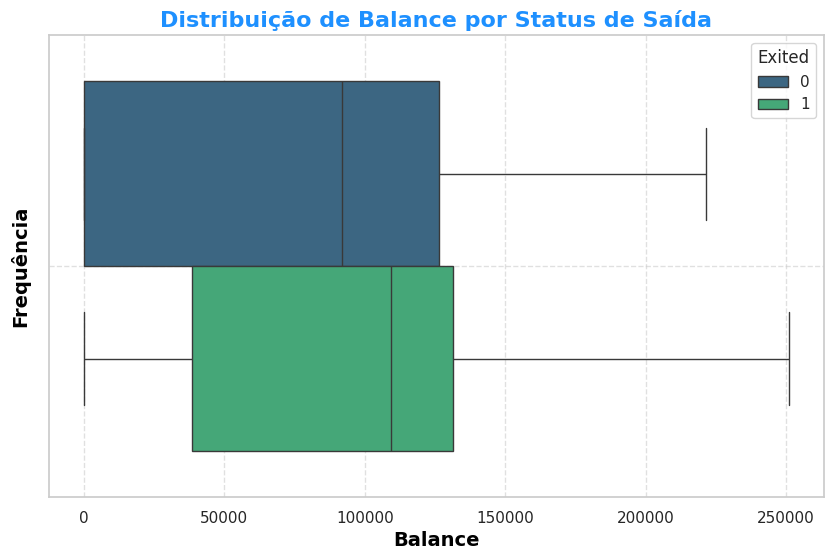

In [8]:
#Plotando a distribuição de clientes por idade e status de saída
plt.figure(figsize=(18, 6))
sns.countplot(data=df_bank, x='Age', hue='Exited', palette='viridis', dodge=True)
plt.title('Contagem de Clientes por Idade e Status de Saída')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend(title='Status de Saída', loc='upper right')
plt.xticks(rotation=0)
plt.show()

#Agora utilizamos o violinplot para visualizar a densidade em valores diferentes
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_bank, x='Exited', y='Age', hue='Exited', palette='viridis')
plt.title('Distribuição de Idade por Status de Saída')
plt.xlabel('Status de Saída')
plt.ylabel('Idade')
plt.xticks([0, 1], ['Permaneceu (0)', 'Saiu (1)'])
plt.show()

# Criar o gráfico de contagem
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_bank, x='IsActiveMember', hue='Exited', palette='viridis')

# Título e rótulos
plt.title('Contagem de Clientes por Status de Atividade e Saída')
plt.xlabel('Status de Atividade do Membro (0 = Inativo, 1 = Ativo)')
plt.ylabel('Contagem')
plt.legend(title='Exited', labels=['Permaneceu (0)', 'Saiu (1)'])

# Adicionar porcentagens no topo das barras
total = len(df_bank)  # Contagem total de registros
for p in ax.patches:
      height = p.get_height()
      if height > 0:
        percentage = f'{100 * height / total:.1f}%' if total > 0 else '0.0%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10, color='black')

plt.show()

#Plotando a Distribuição de balance por status de saída
plt.figure(figsize=(10, 6))
sns.kdeplot(df_bank.loc[df_bank['Exited'] == 0, 'Balance'], label='Permaneceu', fill=True)
sns.kdeplot(df_bank.loc[df_bank['Exited'] == 1, 'Balance'], label='Saiu', fill=True)
plt.xscale('log')  #Escalamento logaritmíco para melhor leitura
plt.title('Distribuição de Balance por Status de Saída')
plt.xlabel('Balance')
plt.ylabel('Densidade')
plt.legend()
plt.show()

#Agora utilizamos o boxplot para visualizar a densidade em valores diferentes
plt.figure(figsize=(10,6))
sns.boxplot(x=df_bank['Balance'], hue=df_bank['Exited'], palette='viridis')
plt.title('Distribuição de Balance por Status de Saída', fontsize=16, weight='bold', color='dodgerblue')
plt.xlabel('Balance', fontsize=14, weight='bold', color='black')
plt.ylabel('Frequência', fontsize=14, weight='bold', color='black')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Preparação dos Dados para Modelagem

Transformaremos as variáveis categóricas usando pd.get_dummies() para codificação.
Iremos escalonar as variáveis numéricas usando o StandardScaler para uniformizar as escalas

In [9]:
from sklearn.preprocessing import StandardScaler

# 1. Separando colunas numéricas das colunas categóricas
categorical_cols = ['Geography', 'Gender', 'Card Type', 'HasCrCard', 'IsActiveMember']
numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score']

# 2. Applicar pd.get_dummies() para as colunas categóricas
df_encoded = pd.get_dummies(df_bank, columns=categorical_cols, drop_first=True)  # drop_first=True para evitar multicolinearidade

# 3. Uniformizar as colunas numéricas usando o StandardScaler
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Agora df_encoded está pronto para modelagem
print(df_encoded.head())


   RowNumber  CustomerId   Surname  CreditScore       Age    Tenure   Balance  \
0          1    15634602  Hargrave    -0.326221  0.293517 -1.041760 -1.225848   
1          2    15647311      Hill    -0.440036  0.198164 -1.387538  0.117350   
2          3    15619304      Onio    -1.536794  0.293517  1.032908  1.333053   
3          4    15701354      Boni     0.501521  0.007457 -1.387538 -1.225848   
4          5    15737888  Mitchell     2.063884  0.388871 -1.041760  0.785728   

   NumOfProducts  EstimatedSalary  Exited  ...  Satisfaction Score  \
0      -0.911583         0.021886       1  ...           -0.721130   
1      -0.911583         0.216534       0  ...           -0.009816   
2       2.527057         0.240687       1  ...           -0.009816   
3       0.807737        -0.108918       0  ...            1.412812   
4      -0.911583        -0.365276       0  ...            1.412812   

   Point Earned  Geography_Germany  Geography_Spain  Gender_Male  \
0           464         


#Divisão dos Dados e Visualização da Distribuição da Variável Alvo nos Conjuntos de Treino e Teste

Este código realiza a divisão de um conjunto de dados em conjuntos de treino e teste, além de visualizar a distribuição da variável alvo "Exited" em ambos os conjuntos.

Tamanho do conjunto de treino: (8000, 17)
Tamanho do conjunto de teste: (2000, 17)


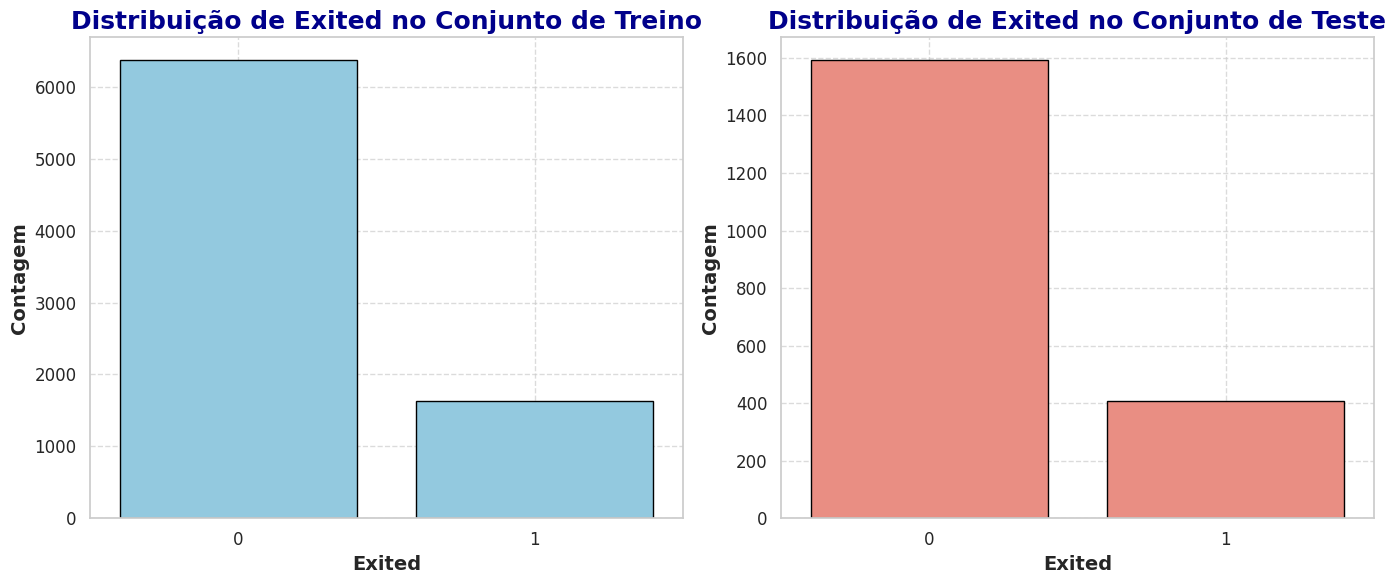

In [10]:
from sklearn.model_selection import train_test_split

# Separar as features e o alvo
X = df_bank.drop('Exited', axis=1)  # Excluir a coluna 'Exited' das features
y = df_bank['Exited']  # Definir 'Exited' como variável alvo

# Dividir em conjunto de treino e teste (80% treino e 20% teste, por exemplo)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Tamanho do conjunto de treino:", X_train.shape)
print("Tamanho do conjunto de teste:", X_test.shape)

sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({'axes.titlesize': 16, 'axes.titleweight': 'bold', 'axes.labelsize': 14, 'axes.labelweight': 'bold'})

# Contagem da variável alvo em cada conjunto
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Conjunto de treino
sns.countplot(x=y_train, color='skyblue', ax=ax[0], edgecolor="black")
ax[0].set_title('Distribuição de Exited no Conjunto de Treino', fontsize=18, weight='bold')
ax[0].set_xlabel('Exited', fontsize=14, weight='bold')
ax[0].set_ylabel('Contagem', fontsize=14, weight='bold')
ax[0].tick_params(axis='x', labelsize=12, rotation=0)
ax[0].tick_params(axis='y', labelsize=12)
ax[0].grid(True, linestyle='--', alpha=0.7)

# Conjunto de teste
sns.countplot(x=y_test, color='salmon', ax=ax[1], edgecolor="black")
ax[1].set_title('Distribuição de Exited no Conjunto de Teste', fontsize=18, weight='bold')
ax[1].set_xlabel('Exited', fontsize=14, weight='bold')
ax[1].set_ylabel('Contagem', fontsize=14, weight='bold')
ax[1].tick_params(axis='x', labelsize=12, rotation=0)
ax[1].tick_params(axis='y', labelsize=12)
ax[1].grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


#Treinamento e Avaliação de Modelos de Classificação: Regressão Logística, Random Forest e XGBoost

Este código aplica três modelos de aprendizado supervisionado (Regressão Logística, Random Forest e XGBoost) para treinar e avaliar a performance de previsão de um problema de classificação. Além disso, ele calcula várias métricas de avaliação para cada modelo, como acurácia, AUC, precisão, recall e F1-score.

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

# Inicializar os modelos com max_iter aumentado para a Regressão Logística
logistic_model = LogisticRegression(random_state=42, max_iter=500)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)

# Lista de modelos para facilitar o treinamento
modelos = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}

# Dicionário para armazenar os resultados
resultados = {
    "Modelo": [],
    "Acurácia": [],
    "AUC": [],
    "Precisão": [],
    "Recall": [],
    "F1-Score": []
}

# Aplicar One-Hot Encoding e padronização aos dados
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Loop para treinar e avaliar cada modelo usando os dados escalonados
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)  # Treinamento do modelo
    y_pred = modelo.predict(X_test_scaled)  # Previsões

    # Cálculo das métricas
    resultados["Modelo"].append(nome)
    resultados["Acurácia"].append(accuracy_score(y_test, y_pred))
    resultados["AUC"].append(roc_auc_score(y_test, modelo.predict_proba(X_test_scaled)[:, 1]))
    resultados["Precisão"].append(precision_score(y_test, y_pred, zero_division=0))
    resultados["Recall"].append(recall_score(y_test, y_pred))
    resultados["F1-Score"].append(f1_score(y_test, y_pred))

# Mostrar resultados em um DataFrame
df_resultados = pd.DataFrame(resultados)
display(df_resultados)


,Modelo,Acurácia,AUC,Precisão,Recall,F1-Score
0,Logistic Regression,0.9970,0.996889,0.997525,0.987745,0.992611
1,Random Forest,0.9985,0.999331,0.997543,0.995098,0.996319
2,XGBoost,0.9985,0.999566,0.997543,0.995098,0.996319


#Visualização Comparativa de Desempenho dos Modelos de Classificação

Este código cria um gráfico de barras que compara o desempenho dos modelos de classificação (Regressão Logística, Random Forest e XGBoost) com base nas métricas de avaliação calculadas anteriormente (como acurácia, AUC, precisão, recall e F1-score).

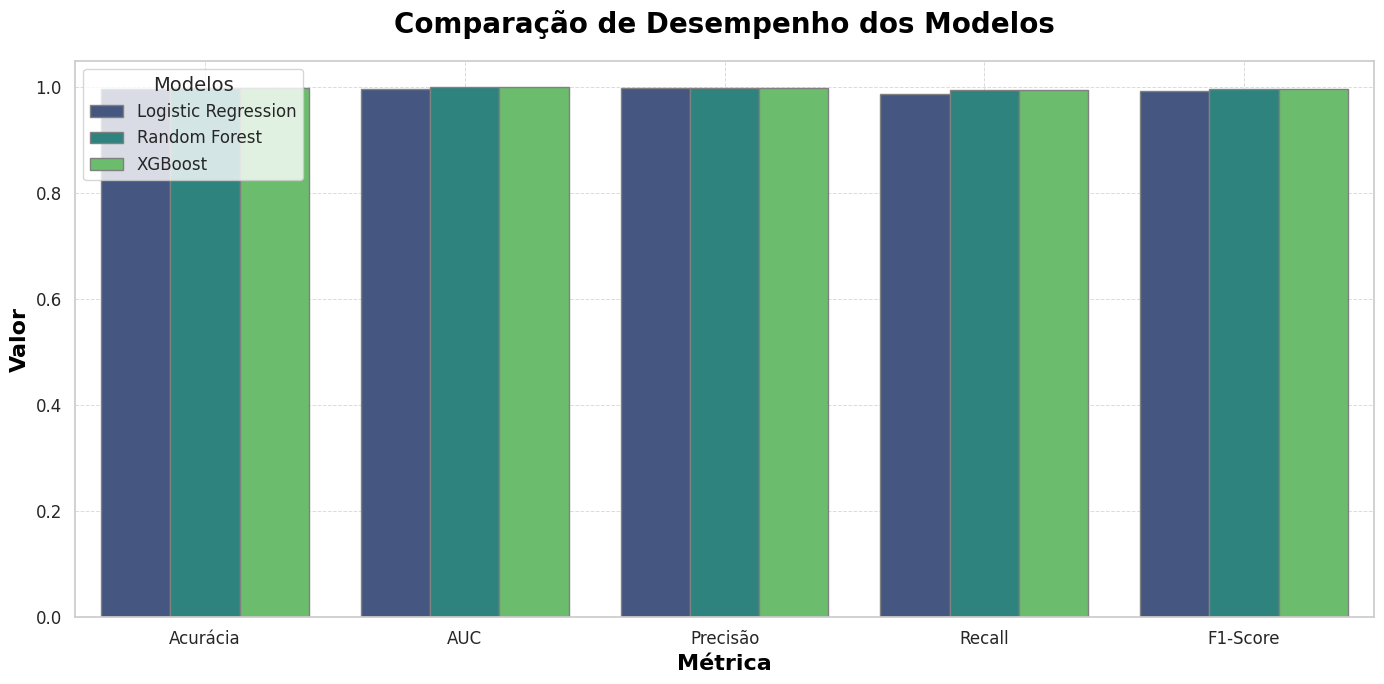

In [12]:

sns.set(style="whitegrid", palette="muted")
plt.rcParams.update({
    'axes.titlesize': 18,
    'axes.titleweight': 'bold',
    'axes.labelsize': 14,
    'axes.labelweight': 'bold',
    'legend.title_fontsize': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'axes.titlepad': 20
})

# Transformando os resultados para o formato longo para facilitar o gráfico
df_resultados_long = pd.melt(df_resultados, id_vars="Modelo", var_name="Métrica", value_name="Valor")

plt.figure(figsize=(14, 7))
sns.barplot(x="Métrica", y="Valor", hue="Modelo", data=df_resultados_long, dodge=True, palette="viridis", edgecolor="gray")

# Customizando o gráfico
plt.title("Comparação de Desempenho dos Modelos", fontsize=20, weight='bold', color='black')
plt.xlabel("Métrica", fontsize=16, weight='bold', color='black')
plt.ylabel("Valor", fontsize=16, weight='bold', color='black')

# Ajuste de grid e fundo
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()

# Melhorando a legenda
plt.legend(title="Modelos", loc='upper left', fontsize=12, title_fontsize=14)

# Exibindo o gráfico
plt.show()


#Curva ROC e AUC para Comparação dos Modelos de Classificação

Este código gera a Curva ROC (Receiver Operating Characteristic) para comparar o desempenho de diferentes modelos de classificação (Regressão Logística, Random Forest e XGBoost). A Curva ROC é uma ferramenta poderosa para avaliar a capacidade de um modelo em distinguir entre classes positivas e negativas, especialmente em problemas desbalanceados.

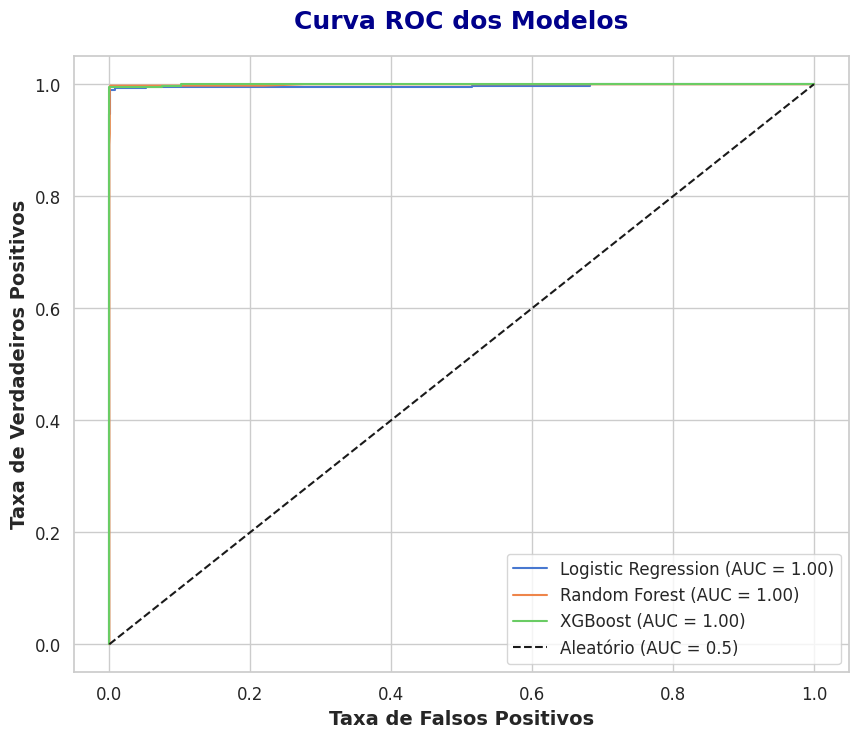

In [13]:
from sklearn.metrics import roc_curve, auc  # Importar roc_curve e auc

plt.figure(figsize=(10, 8))
for nome, modelo in modelos.items():
    modelo.fit(X_train_scaled, y_train)  # Treinamento
    y_proba = modelo.predict_proba(X_test_scaled)[:, 1]  # Prever probabilidades
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {roc_auc:.2f})')

# Linha de referência
plt.plot([0, 1], [0, 1], 'k--', label="Aleatório (AUC = 0.5)")
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC dos Modelos')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#Verificação de Overfitting Usando Validação Cruzada

Após observar que os modelos de classificação apresentaram um valor de desempenho muito alto, comecei a suspeitar da presença de overfitting, ou seja, que o modelo pode estar se ajustando demais aos dados de treinamento, o que pode prejudicar sua generalização para dados não vistos.

Para testar essa hipótese, utilizei a validação cruzada (cross-validation) para avaliar a performance dos modelos de forma mais robusta. A validação cruzada divide o conjunto de dados de treinamento em "k" partes (folds) e treina/testa o modelo em diferentes combinações dessas partes, garantindo uma avaliação mais confiável da capacidade de generalização do modelo.

In [14]:
from sklearn.model_selection import cross_val_score

# Redefinindo dicionário para armazenar resultados de cross-validation
resultados_cv = {
    "Modelo": [],
    "Acurácia Média": [],
    "AUC Média": [],
    "Precisão Média": [],
    "Recall Médio": [],
    "F1-Score Médio": []
}

# Definir número de folds
k = 5

# Aplicar validação cruzada para cada modelo
for nome, modelo in modelos.items():
    # Executar cross-validation para cada métrica
    acuracias = cross_val_score(modelo, X_train_scaled, y_train, cv=k, scoring='accuracy')
    aucs = cross_val_score(modelo, X_train_scaled, y_train, cv=k, scoring='roc_auc')
    precisao = cross_val_score(modelo, X_train_scaled, y_train, cv=k, scoring='precision', error_score='raise')
    recall = cross_val_score(modelo, X_train_scaled, y_train, cv=k, scoring='recall', error_score='raise')
    f1 = cross_val_score(modelo, X_train_scaled, y_train, cv=k, scoring='f1', error_score='raise')

    # Adicionar os resultados médios ao dicionário
    resultados_cv["Modelo"].append(nome)
    resultados_cv["Acurácia Média"].append(acuracias.mean())
    resultados_cv["AUC Média"].append(aucs.mean())
    resultados_cv["Precisão Média"].append(precisao.mean())
    resultados_cv["Recall Médio"].append(recall.mean())
    resultados_cv["F1-Score Médio"].append(f1.mean())

# Mostrar resultados de cross-validation em um DataFrame
df_resultados_cv = pd.DataFrame(resultados_cv)
display(df_resultados_cv)


,Modelo,Acurácia Média,AUC Média,Precisão Média,Recall Médio,F1-Score Médio
0,Logistic Regression,0.998000,0.999159,0.993913,0.996319,0.995098
1,Random Forest,0.998625,0.999714,0.994521,0.998773,0.996635
2,XGBoost,0.998500,0.999707,0.995118,0.997546,0.996325


#Criação de Dados Randomicos para testar os modelos de classificação

In [15]:

import numpy as np

# Definindo um número de registros (linhas) para o conjunto de dados leve
num_records = 1000

# Gerando dados aleatórios para cada coluna
data = {
    'RowNumber': np.arange(1, num_records + 1),
    'CustomerId': np.random.randint(10000000, 99999999, size=num_records),
    'Surname': ['Surname' + str(i) for i in range(num_records)],
    'CreditScore': np.random.randint(300, 850, size=num_records),
    'Geography': np.random.choice(['France', 'Germany', 'Spain'], size=num_records),
    'Gender': np.random.choice(['Male', 'Female'], size=num_records),
    'Age': np.random.randint(18, 90, size=num_records),
    'Tenure': np.random.randint(0, 10, size=num_records),
    'Balance': np.round(np.random.uniform(0, 250000, size=num_records), 2),
    'NumOfProducts': np.random.randint(1, 4, size=num_records),
    'HasCrCard': np.random.choice([0, 1], size=num_records),
    'IsActiveMember': np.random.choice([0, 1], size=num_records),
    'EstimatedSalary': np.round(np.random.uniform(20000, 150000, size=num_records), 2),
    'Exited': np.random.choice([0, 1], size=num_records, p=[0.8, 0.2]),  # Exited is imbalanced
    'Complain': np.random.choice([0, 1], size=num_records, p=[0.9, 0.1]), # Most have no complaints
    'Satisfaction Score': np.random.randint(1, 6, size=num_records),  # Score between 1 and 5
    'Card Type': np.random.choice(['Silver', 'Gold', 'Platinum'], size=num_records),
    'Points Earned': np.random.randint(0, 1000, size=num_records)
}

# Criando o DataFrame
df_test = pd.DataFrame(data)

# Exibir as primeiras linhas do DataFrame
print(df_test.head())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    32235692  Surname0          797   Germany    Male   87   
1          2    93388699  Surname1          684     Spain    Male   40   
2          3    75064667  Surname2          397   Germany  Female   48   
3          4    68835759  Surname3          703   Germany    Male   40   
4          5    69337269  Surname4          433    France    Male   73   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       0  243806.30              3          1               1   
1       8   71791.87              2          0               1   
2       6  222835.76              3          1               0   
3       6   22916.51              1          1               1   
4       3  187938.70              3          1               1   

   EstimatedSalary  Exited  Complain  Satisfaction Score Card Type  \
0         82746.47       0         0                   4      Gold   
1        124260.07


#Treinamento e Avaliação de Modelos de Classificação com Validação Interna e Externa
O código prepara os dados para análise, realizando a separação entre variáveis independentes e dependentes e aplicando One-Hot Encoding nas variáveis categóricas e escalonamento nas variáveis numéricas. Em seguida, três modelos de classificação (Logistic Regression, Random Forest e XGBoost) são avaliados em dois tipos de validação: interna, usando Stratified K-Fold Cross-Validation para medir o desempenho no conjunto de treino, e externa, avaliando os modelos no conjunto de teste df_test. Os resultados das métricas de desempenho, como Acurácia, AUC, Precisão, Recall e F1-Score, são comparados para verificar a consistência do modelo e identificar possíveis casos de overfitting.

In [16]:
from sklearn.model_selection import StratifiedKFold

# Verificar o número de amostras para garantir consistência
print("Tamanho de X_train_scaled:", X_train_scaled.shape)
print("Tamanho de y_train:", y_train.shape)

# Modelos para serem testados
logistic_model = LogisticRegression(random_state=42, max_iter=500)
random_forest_model = RandomForestClassifier(random_state=42)
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)

modelos = {
    "Logistic Regression": logistic_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}

resultados_validacao_interna = {
    "Modelo": [],
    "Acurácia Média": [],
    "AUC Média": [],
    "Precisão Média": [],
    "Recall Médio": [],
    "F1-Score Médio": []
}

resultados_validacao_externa = {
    "Modelo": [],
    "Acurácia Externa": [],
    "AUC Externa": [],
    "Precisão Externa": [],
    "Recall Externo": [],
    "F1-Score Externo": []
}

# Cross-validation (validação interna com df_bank)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for nome, modelo in modelos.items():
    # Cross-validation scores
    auc_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=cv, scoring='roc_auc')
    accuracy_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=cv, scoring='accuracy')
    precision_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=cv, scoring='precision')
    recall_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=cv, scoring='recall')
    f1_scores = cross_val_score(modelo, X_train_scaled, y_train, cv=cv, scoring='f1')

    # Armazenar resultados da validação interna
    resultados_validacao_interna["Modelo"].append(nome)
    resultados_validacao_interna["Acurácia Média"].append(accuracy_scores.mean())
    resultados_validacao_interna["AUC Média"].append(auc_scores.mean())
    resultados_validacao_interna["Precisão Média"].append(precision_scores.mean())
    resultados_validacao_interna["Recall Médio"].append(recall_scores.mean())
    resultados_validacao_interna["F1-Score Médio"].append(f1_scores.mean())

    # Treinar o modelo no conjunto de treino completo
    modelo.fit(X_train_scaled, y_train)

    # Avaliação no conjunto df_test (validação externa)
    y_pred_test = modelo.predict(X_test_scaled)
    y_proba_test = modelo.predict_proba(X_test_scaled)[:, 1]

    # Armazenar resultados da validação externa
    resultados_validacao_externa["Modelo"].append(nome)
    resultados_validacao_externa["Acurácia Externa"].append(accuracy_score(y_test, y_pred_test))
    resultados_validacao_externa["AUC Externa"].append(roc_auc_score(y_test, y_proba_test))
    resultados_validacao_externa["Precisão Externa"].append(precision_score(y_test, y_pred_test, zero_division=0))
    resultados_validacao_externa["Recall Externo"].append(recall_score(y_test, y_pred_test))
    resultados_validacao_externa["F1-Score Externo"].append(f1_score(y_test, y_pred_test))

# DataFrames para visualização dos resultados
df_validacao_interna = pd.DataFrame(resultados_validacao_interna)
df_validacao_externa = pd.DataFrame(resultados_validacao_externa)

# Exibir os resultados lado a lado
print("Resultados da Validação Interna (Cross-Validation com df_bank):")
display(df_validacao_interna)
print("\nResultados da Validação Externa (df_test):")
display(df_validacao_externa)


Tamanho de X_train_scaled: (8000, 2645)
Tamanho de y_train: (8000,)
Resultados da Validação Interna (Cross-Validation com df_bank):


,Modelo,Acurácia Média,AUC Média,Precisão Média,Recall Médio,F1-Score Médio
0,Logistic Regression,0.998250,0.999018,0.994503,0.996933,0.995712
1,Random Forest,0.998625,0.999520,0.994510,0.998773,0.996635
2,XGBoost,0.998250,0.999687,0.995111,0.996319,0.995709



Resultados da Validação Externa (df_test):


,Modelo,Acurácia Externa,AUC Externa,Precisão Externa,Recall Externo,F1-Score Externo
0,Logistic Regression,0.9970,0.996889,0.997525,0.987745,0.992611
1,Random Forest,0.9985,0.999331,0.997543,0.995098,0.996319
2,XGBoost,0.9985,0.999566,0.997543,0.995098,0.996319


Sem Overfitting: O desempenho dos modelos na validação interna é muito semelhante ao desempenho na validação externa. A leve diminuição nas métricas entre a validação interna e externa (principalmente para Logistic Regression) é normal, pois o modelo está sendo testado em dados diferentes do conjunto de treinamento. No entanto, a queda nas métricas não é grande o suficiente para indicar overfitting.

Métricas Consistentes: A acurácia, AUC, precisão, recall e F1-score mantiveram-se muito altas tanto no treinamento quanto no teste, o que sugere que os modelos são generalizáveis e não estão "decorando" o conjunto de treinamento.

Portanto, com base nesses resultados, não parece haver overfitting nos seus modelos. Eles estão mantendo um bom desempenho tanto na validação interna (com cross-validation) quanto na validação externa (com o conjunto de teste).








# Previsão de Churn de Clientes Usando Vários Modelos de Machine Learning (Regressão Logística, Random Forest e XGBoost)

In [17]:

# Instanciando os modelos
logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
xgboost_model = XGBClassifier(random_state=42)

# Treinando os modelos com o conjunto de treino
logistic_regression_model.fit(X_train_scaled, y_train)
random_forest_model.fit(X_train_scaled, y_train)
xgboost_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [18]:
# Importações necessárias
import pandas as pd
import numpy as np

# Função para coletar e validar os dados do cliente
def obter_dados_cliente():
    print("Insira as informações do cliente para previsão:")

    def validar_inteiro(prompt, min_val=None, max_val=None):
        while True:
            try:
                valor = int(input(prompt))
                if (min_val is None or valor >= min_val) and (max_val is None or valor <= max_val):
                    return valor
                else:
                    print(f"Por favor, insira um valor entre {min_val} e {max_val}.")
            except ValueError:
                print("Entrada inválida. Insira um número inteiro.")

    def validar_float(prompt, min_val=None, max_val=None):
        while True:
            try:
                valor = float(input(prompt))
                if (min_val is None or valor >= min_val) and (max_val is None or valor <= max_val):
                    return valor
                else:
                    print(f"Por favor, insira um valor entre {min_val} e {max_val}.")
            except ValueError:
                print("Entrada inválida. Insira um número decimal.")

    def validar_opcao(prompt, opcoes):
        opcoes_lower = [opcao.lower() for opcao in opcoes]
        while True:
            valor = input(prompt).strip().lower()
            if valor in opcoes_lower:
                return opcoes[opcoes_lower.index(valor)]
            else:
                print(f"Opção inválida. As opções válidas são: {', '.join(opcoes)}.")

    CreditScore = validar_inteiro("Credit Score (300-850): ", 300, 850)
    Geography = validar_opcao("Geography (France, Germany, Spain): ", ["France", "Germany", "Spain"])
    Gender = validar_opcao("Gender (Male, Female): ", ["Male", "Female"])
    Age = validar_inteiro("Age (18-100): ", 18, 100)
    Tenure = validar_inteiro("Tenure (0-25): ", 0, 25)
    Balance = validar_float("Balance: ")
    NumOfProducts = validar_inteiro("Num of Products (1-4): ", 1, 4)
    HasCrCard = int(validar_opcao("Has Credit Card? (1 for Yes, 0 for No): ", ["0", "1"]))
    IsActiveMember = int(validar_opcao("Is Active Member? (1 for Yes, 0 for No): ", ["0", "1"]))
    EstimatedSalary = validar_float("Estimated Salary: ")
    Complain = int(validar_opcao("Complain (1 for Yes, 0 for No): ", ["0", "1"]))
    Satisfaction_Score = validar_inteiro("Satisfaction Score (1-5): ", 1, 5)
    Card_Type = validar_opcao("Card Type (Silver, Gold, Platinum, Diamond): ", ["Silver", "Gold", "Platinum", "Diamond"])
    Points_Earned = validar_inteiro("Points Earned: ", 0)

    # Criar o DataFrame com os dados do cliente
    cliente_novo = pd.DataFrame({
        'CreditScore': [CreditScore],
        'Geography': [Geography],
        'Gender': [Gender],
        'Age': [Age],
        'Tenure': [Tenure],
        'Balance': [Balance],
        'NumOfProducts': [NumOfProducts],
        'HasCrCard': [HasCrCard],
        'IsActiveMember': [IsActiveMember],
        'EstimatedSalary': [EstimatedSalary],
        'Complain': [Complain],
        'Satisfaction Score': [Satisfaction_Score],
        'Card Type': [Card_Type],
        'Points Earned': [Points_Earned]
    })

    return cliente_novo

# Função para fazer previsões com vários modelos
def fazer_previsoes_multiplos_modelos(cliente_novo, modelos, scaler, X_train_encoded):
    """
    Realiza previsões de churn para um cliente utilizando múltiplos modelos.

    Parâmetros:
    - cliente_novo: DataFrame com os dados do cliente.
    - modelos: Dicionário com os nomes dos modelos e os objetos de modelo treinados.
    - scaler: Objeto de escalonamento usado no treinamento.
    - X_train_encoded: DataFrame com as colunas do conjunto de treino após o one-hot encoding.
    """
    # One-Hot Encoding e alinhamento com o conjunto de treino
    cliente_novo_encoded = pd.get_dummies(cliente_novo)
    cliente_novo_encoded = cliente_novo_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

    # Escalonar as variáveis
    cliente_novo_scaled = scaler.transform(cliente_novo_encoded)

    # Armazenar previsões de cada modelo
    print("\nResultados das Previsões:")
    print("=" * 40)

    for nome_modelo, modelo in modelos.items():
        # Fazer previsões
        probabilidade_saida = modelo.predict_proba(cliente_novo_scaled)[:, 1]
        saida_prevista = modelo.predict(cliente_novo_scaled)

        # Mostrar resultados para o modelo atual
        print(f"Modelo: {nome_modelo}")
        print(f" - Probabilidade de Saída: {probabilidade_saida[0]:.2%}")
        print(f" - Previsão: {'Sairá' if saida_prevista[0] == 1 else 'Permanecerá'}")
        print("-" * 40)

# Definição dos modelos treinados (exemplo)
modelos = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "XGBoost": xgboost_model
}

# Coleta de dados do cliente
cliente_novo = obter_dados_cliente()

# Fazer previsões para todos os modelos
fazer_previsoes_multiplos_modelos(cliente_novo, modelos, scaler, X_train_encoded)


Insira as informações do cliente para previsão:
Credit Score (300-850): 300
Geography (France, Germany, Spain): france
Gender (Male, Female): male
Age (18-100): 35
Tenure (0-25): 0
Balance: 4
Num of Products (1-4): 2
Has Credit Card? (1 for Yes, 0 for No): 1
Is Active Member? (1 for Yes, 0 for No): 1
Estimated Salary: 3000
Complain (1 for Yes, 0 for No): 1
Satisfaction Score (1-5): 3
Card Type (Silver, Gold, Platinum, Diamond): gold
Points Earned: 472

Resultados das Previsões:
Modelo: Logistic Regression
 - Probabilidade de Saída: 0.00%
 - Previsão: Permanecerá
----------------------------------------
Modelo: Random Forest
 - Probabilidade de Saída: 85.00%
 - Previsão: Sairá
----------------------------------------
Modelo: XGBoost
 - Probabilidade de Saída: 48.04%
 - Previsão: Permanecerá
----------------------------------------
